In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import fftpack 

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


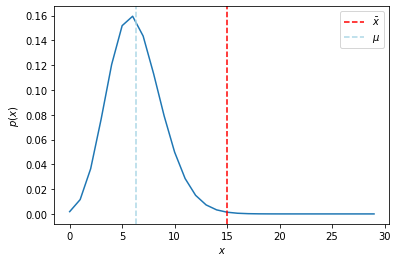

Probability of >15 hurricanes in a year: 0.222%


In [16]:
from scipy import stats

mu =  6.3
sigma = np.sqrt(mu)

x_bar = 15

Z = abs(x_bar - mu) / sigma
print("Z =", Z)

# plot pmf
k = np.arange(30)
y = stats.poisson.pmf(k, mu)
plt.plot(k, y)
plt.axvline(x_bar, linestyle='--', color='red', label=r'$\bar{x}$')
plt.axvline(mu, linestyle='--', color='lightblue', label='$\mu$')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

p_15_or_more = (1. - np.sum(stats.poisson.pmf(np.arange(15), mu)))*100
print("Probability of >15 hurricanes in a year: {:.3f}%".format(p_15_or_more))

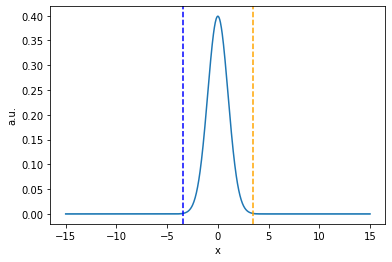

p-value = 0.00053
15 is NOT a statiscally significant number


In [18]:
# plot the test statistics and its pdf
xs = np.linspace(-15, +15, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

min_limit = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value = {:.5f}".format(pvalue))
print("{} is a statiscally significant number".format(x_bar) if pvalue >= min_limit else "{} is NOT a statiscally significant number".format(x_bar))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.787


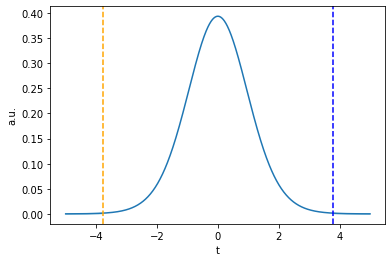

p-value = 0.00135 < α/2, so we can say that the change in blood pressure within our samples is NOT statistically significant


In [35]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

x_bar_pre = np.mean(pre)
x_bar_post = np.mean(post)
sigma_pre = np.sqrt(np.var(pre, ddof=1)) 
sigma_post = np.sqrt(np.var(post, ddof=1))

# Test statistics
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

T = (x_bar_pre - x_bar_post) / (sigma * np.sqrt(2/n))
print("T = {:.3f}".format(T))

# plot of test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, 2*n - 2)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, 2*n - 2) + (1. - stats.t.cdf(-T, 2*n - 2))
print("p-value = {:.5f} < ".format(pvalue) + "\N{GREEK SMALL LETTER ALPHA}/2" + ", so we can say that the change in blood pressure within our samples is NOT"
     +" statistically significant")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

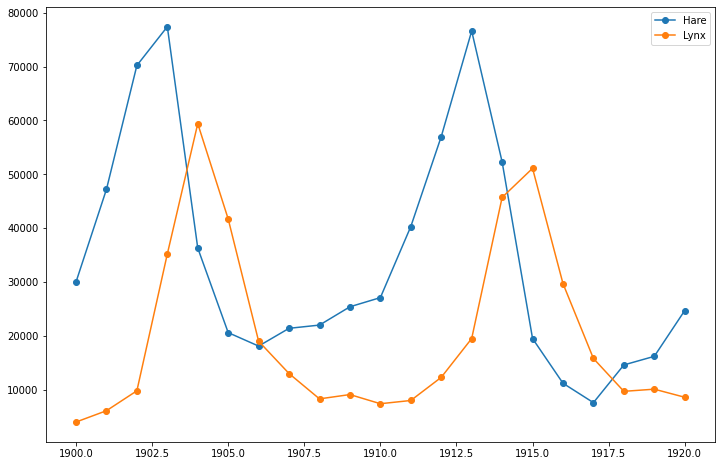

In [37]:
data = np.loadtxt('data/populations.txt')
years, hares, lynxes, _ = data.T

plt.figure(figsize=(12,8))
plt.plot(years, hares, 'o-') 
plt.plot(years, lynxes, 'o-') 
plt.legend(('Hare', 'Lynx'))

Hares period: 10.5
Lynxes period: 10.5


Text(0, 0.5, 'Power')

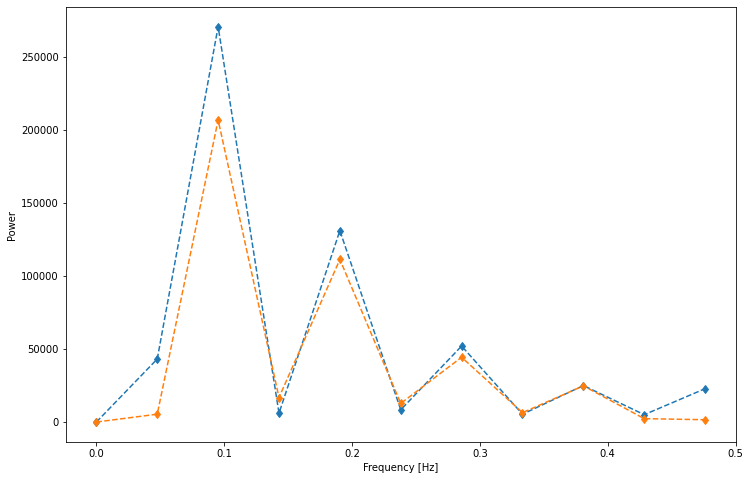

In [49]:
N = len(hares)

#populations fft
fft_hares = fftpack.fft(hares)
fft_lynxes = fftpack.fft(lynxes)

#populations power
power_h = np.abs(fft_hares)
power_l = np.abs(fft_lynxes)

sample_freq = fftpack.fftfreq(N)

pos_mask = np.where(sample_freq >= 0)
freqs = sample_freq[pos_mask]
powes_h = power_h[pos_mask]
powes_l = power_l[pos_mask]
# find the max of freqs array
peak_freq_h = freqs[powes_h.argmax()]
peak_freq_l = freqs[powes_l.argmax()]

hares_period = 1./peak_freq_h # Hares population period
lynxes_period = 1./peak_freq_l # Lynxes population period

print("Hares period: {}".format(hares_period))
print("Lynxes period: {}".format(lynxes_period))

plt.figure(figsize=(12, 8))
plt.plot(freqs, powes_h, '--d')
plt.plot(freqs, powes_l, '--d')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Original image')

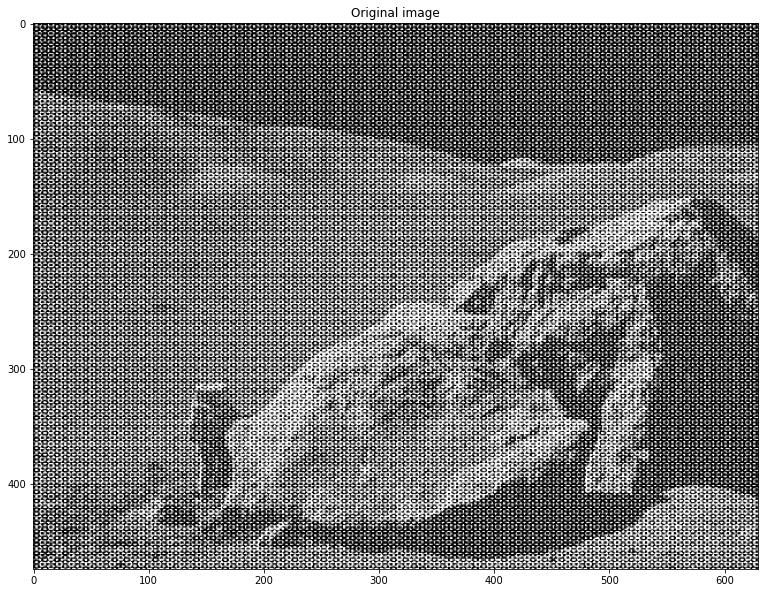

In [51]:
plt.figure(figsize = (13,13))
img = plt.imread('moonlanding.png')
plt.imshow(img, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier Transform')

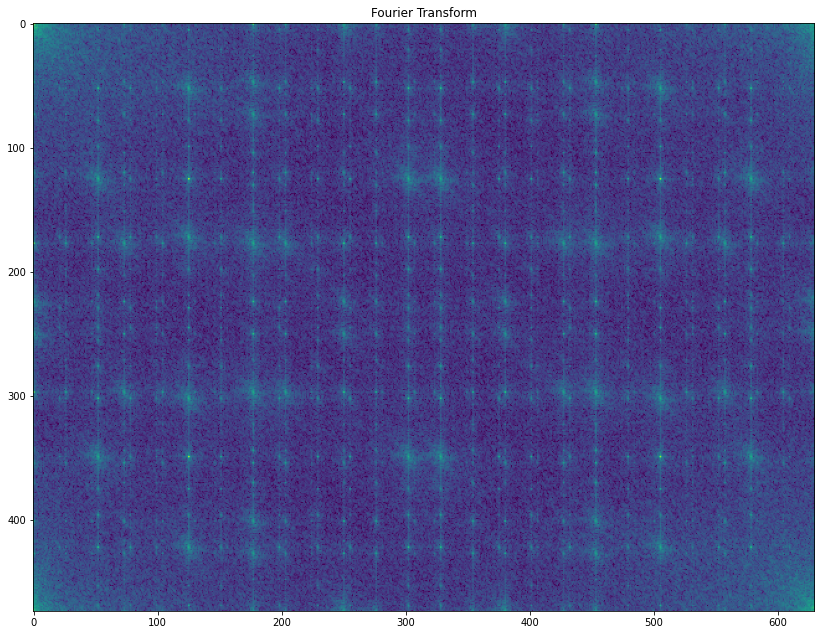

In [52]:
from matplotlib.colors import LogNorm

fft = fftpack.fft2(img)
plt.figure(figsize=(14, 14))
plt.imshow(np.abs(fft), norm=LogNorm(vmin=5))
plt.title('Fourier Transform')

Text(0.5, 1.0, 'Filtered spectrum')

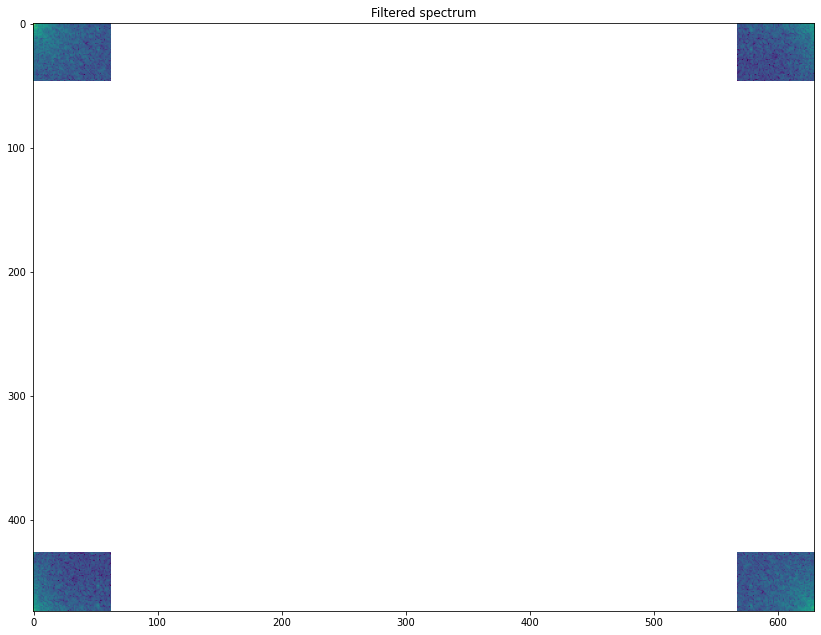

In [53]:
# low pass filter
ratio = 0.1 # The threshold of rows/columns of the spectrum to keep for the final reconstruction
fft_copy = fft.copy()

fft_copy[int(ratio*fft_copy.shape[0]):int((1-ratio)*fft_copy.shape[0]), :] = 0
fft_copy[:, int(ratio*fft_copy.shape[1]):int((1-ratio)*fft_copy.shape[1])] = 0

plt.figure(figsize=(14, 14))
plt.imshow(np.abs(fft_copy), norm=LogNorm(vmin=5))
plt.title('Filtered spectrum')

Text(0.5, 1.0, 'Reconstructed image')

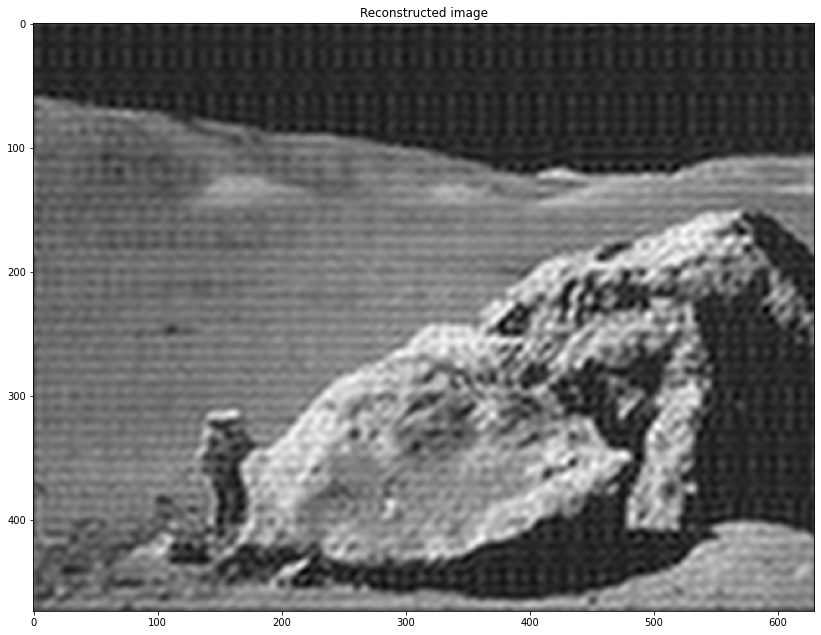

In [54]:
img_reconstructed = fftpack.ifft2(fft_copy).real
plt.figure(figsize=(14, 14))
plt.imshow(img_reconstructed, plt.cm.gray)
plt.title('Reconstructed image')